In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [103]:
data = pd.read_csv('../data/final2_merged_drought_temp.csv')

In [106]:
data.head()

ValidEnd     Name state  area_none   area_d0  area_d1  area_d2  area_d3  \
1  2020-12-28  Alabama    AL   39068.95  12535.39      0.0      0.0      0.0   
2  2020-12-21  Alabama    AL   39068.95  12535.40      0.0      0.0      0.0   
3  2020-12-14  Alabama    AL   42812.87   8791.48      0.0      0.0      0.0   
4  2020-12-07  Alabama    AL   45608.51   5995.84      0.0      0.0      0.0   
5  2020-11-30  Alabama    AL   42750.86   8853.49      0.0      0.0      0.0   

   area_d4  population_none  ...  population_d4  DSCI  total_area  \
1      0.0       4038013.82  ...            0.0    24    51604.34   
2      0.0       4038013.43  ...            0.0    24    51604.35   
3      0.0       4239664.15  ...            0.0    17    51604.35   
4      0.0       4483976.48  ...            0.0    12    51604.35   
5      0.0       4181999.46  ...            0.0    17    51604.35   

   total_population  climate_regions   avg_tmax   avg_tmin  \
1        4779736.02        Southeast  57.797143  30.522857   
2        4779736.02        Southeast  53.634286  34.314286   
3        4779736.02        Southeast  64.145714  38.808571   
4        4779736.02        Southeast  55.377143  31.965714   
5        4779736.03        Southeast  64.227857  44.435000   

   total_avg_prcp_inches temp_id  total_avg_prcp_mm  
1                  1.440      98            36.5760  
2                  0.354      98             8.9916  
3                  1.236      98            31.3944  
4                  0.852      98            21.6408  
5                  2.222      98            56.4388  

[5 rows x 24 columns]

In [105]:
#dropping december week
indexNames = data[ data['ValidEnd'] == '2021-01-04' ].index
data.drop(indexNames , inplace=True)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47025 entries, 0 to 47024
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ValidEnd               47025 non-null  object 
 1   Name                   47025 non-null  object 
 2   state                  47025 non-null  object 
 3   area_none              47025 non-null  float64
 4   area_d0                47025 non-null  float64
 5   area_d1                47025 non-null  float64
 6   area_d2                47025 non-null  float64
 7   area_d3                47025 non-null  float64
 8   area_d4                47025 non-null  float64
 9   population_none        47025 non-null  float64
 10  population_d0          47025 non-null  float64
 11  population_d1          47025 non-null  float64
 12  population_d2          47025 non-null  float64
 13  population_d3          47025 non-null  float64
 14  population_d4          47025 non-null  float64
 15  DS

In [107]:
data.shape

(46980, 24)

In [108]:
#change the format of the time of the regions
data['ValidEnd']= pd.to_datetime(data['ValidEnd'])
data['ValidEnd'] = data['ValidEnd'].dt.strftime('%m/%d/%Y')
data['ValidEnd']=data['ValidEnd'].astype('datetime64[ns]')

## graphics of the Climate regions 

In [110]:
data.groupby(data['climate_regions'])['DSCI'].mean()

climate_regions
Northeast                       36.195163
Northern Rockies and Plains    105.121073
Northwest                      111.024904
Ohio Valley                     36.665572
South                           85.607120
Southeast                       78.231960
Southwest                      162.314416
Upper Midwest                   49.033285
West                           166.890805
Name: DSCI, dtype: float64

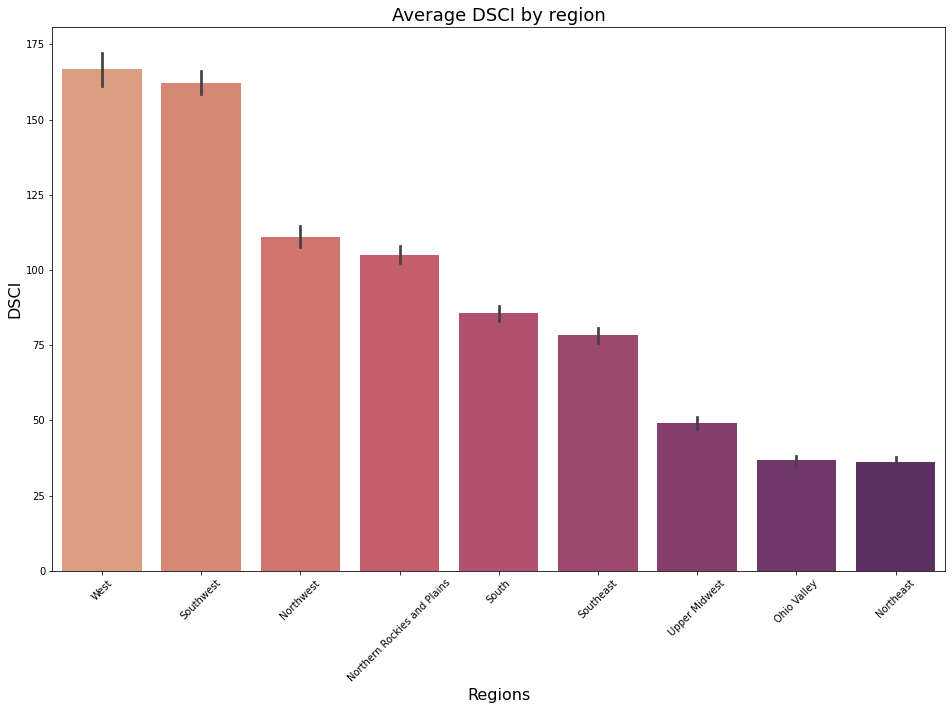

In [201]:
order= data.groupby(data['climate_regions'])['DSCI'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='climate_regions',
    y='DSCI',
    data=data,order=order,palette="flare");
plt.title('Average DSCI by region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('DSCI',fontdict={'fontsize':16});
plt.xticks(rotation=45)
plt.savefig('../images/Average_DSCI_of_20.png')

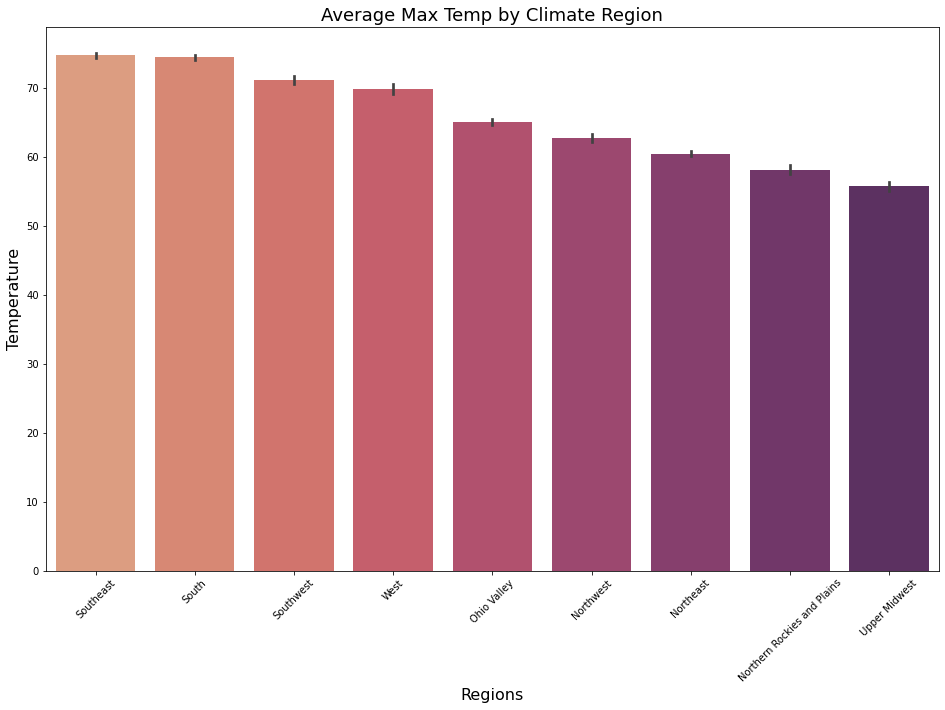

In [202]:
order= data.groupby(data['climate_regions'])['avg_tmax'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='climate_regions',
    y='avg_tmax',
    data=data,order=order,palette="flare");
plt.title('Average Max Temp by Climate Region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('Temperature',fontdict={'fontsize':16});
plt.xticks(rotation=45)
plt.savefig('../images/Average_temperature_of_20.png')

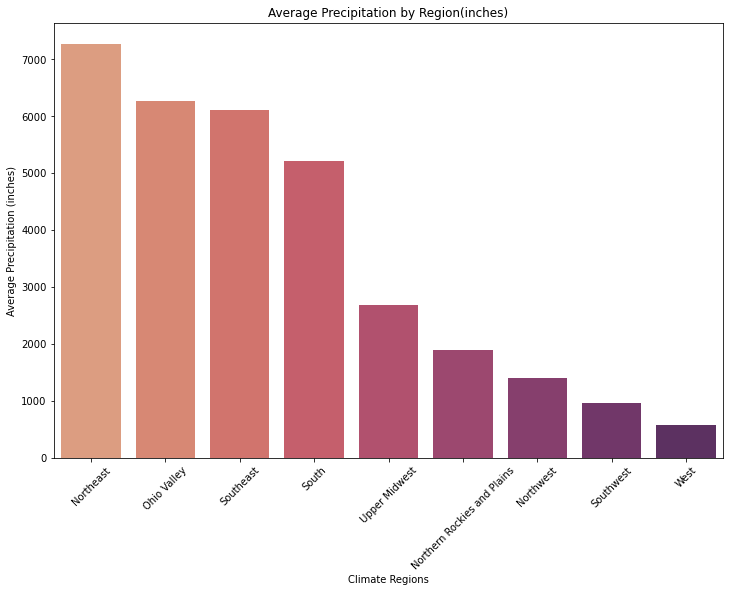

In [231]:

order= data.groupby(data['climate_regions'])['total_avg_prcp_inches'].sum()
order_index= data.groupby(data['climate_regions'])['total_avg_prcp_inches'].sum().sort_values().iloc[::-1].index

order=pd.DataFrame(order)
order.reset_index(inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x='climate_regions',
    y='total_avg_prcp_inches',
    data=order,order=order_index,palette="flare");
plt.title('Average Precipitation by Region(inches)',fontdict={'fontsize':12});
plt.xlabel('Climate Regions',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('Average Precipitation (inches)',fontdict={'fontsize':10})
plt.savefig('../images/average_prec.png')

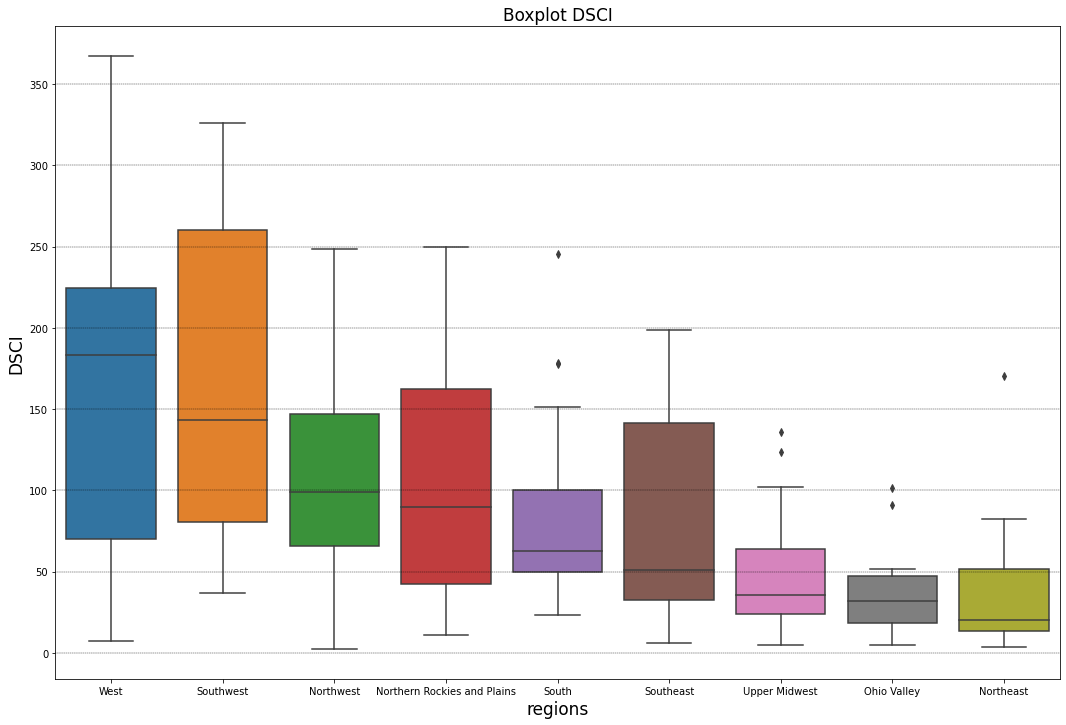

In [195]:
#graph the DCSI of the regions
order= df_regions_years.groupby(df_regions_years['climate_regions'])['mean'].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(18, 12))
sns.boxplot(x='climate_regions',
    y='mean',
    data=df_regions_years,order=order)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('regions',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('../images/boxplot_DSCI.png')

## graphics of Time serie of the Climate regions 

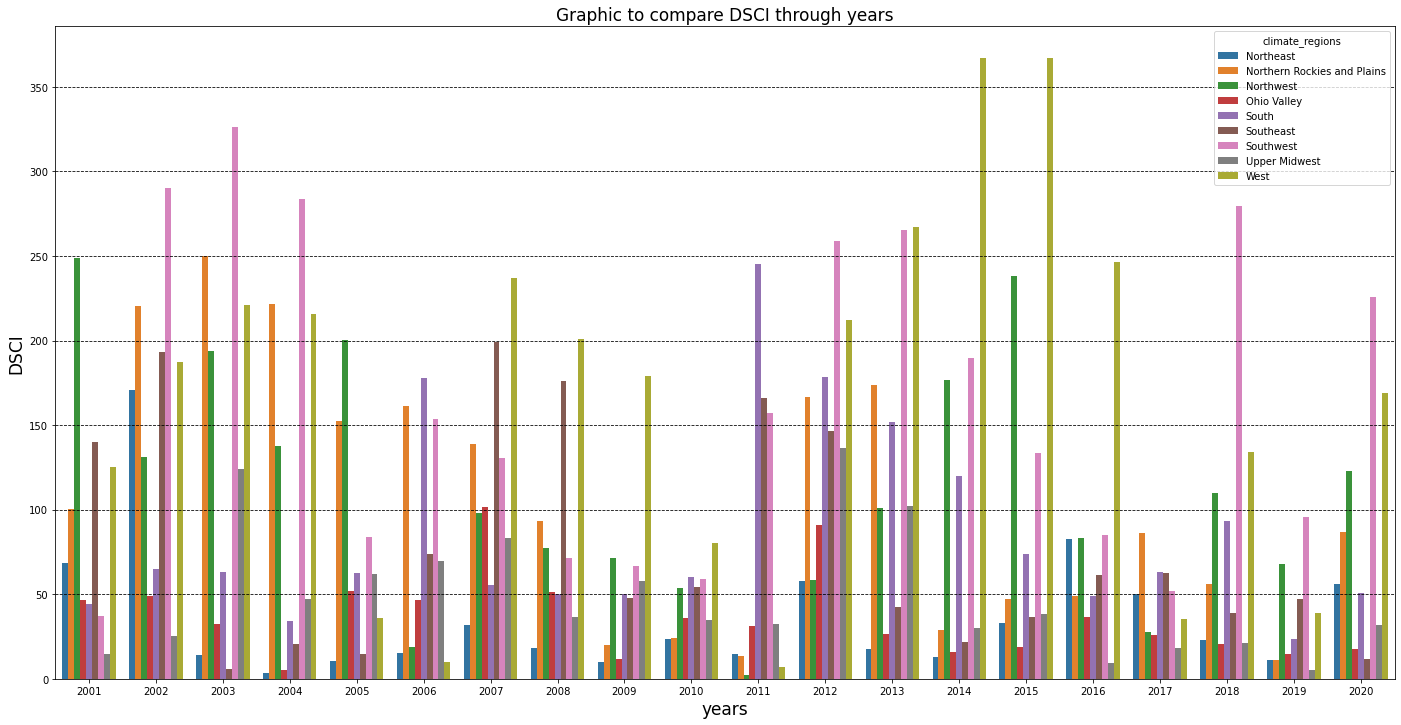

In [203]:

df_regions_years=data.groupby(by=[data['ValidEnd'].dt.year,data['climate_regions']])['DSCI'].agg([ 'mean'])

df_regions_years.reset_index(inplace=True)
#graph the DCSI of the regions
plt.figure(figsize=(24, 12))
sns.barplot(x='ValidEnd',
    y='mean',
    hue='climate_regions',
    data=df_regions_years)
plt.title('Graphic to compare DSCI through years',fontdict={'fontsize':17});
plt.xlabel('years',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)
plt.savefig('../images/dsci_regions.png')

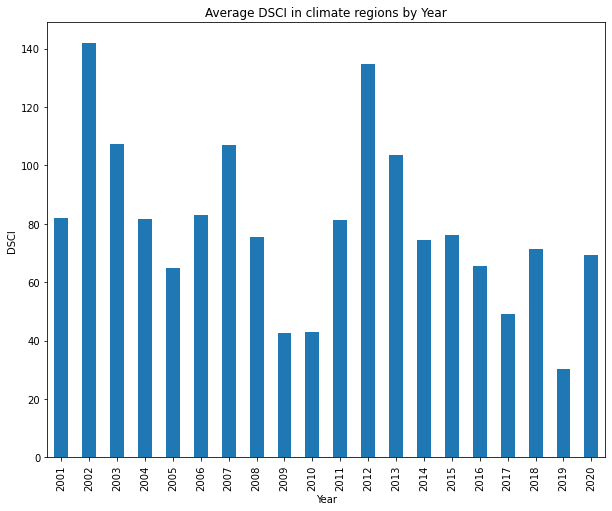

In [173]:
years_DSCI = data.groupby(data['ValidEnd'].dt.year)['DSCI'].mean()
years_DSCI.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("DSCI")
plt.title(f'Average DSCI in climate regions by Year');
plt.savefig('../images/Average_DSCI_by years.png')

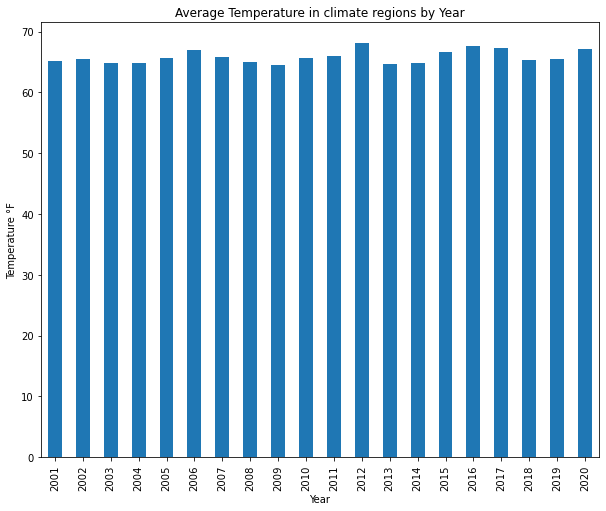

In [174]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['avg_tmax'].mean()
years_temp.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("Temperature °F")
plt.title(f'Average Temperature in climate regions by Year');
plt.savefig('../images/Average_temp_by_years.png')

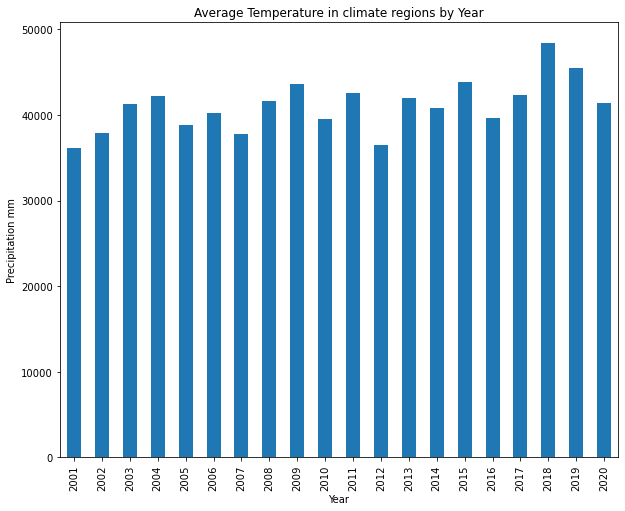

In [175]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['total_avg_prcp_mm'].sum()
years_temp.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("Precipitation mm")
plt.title(f'Average Temperature in climate regions by Year');
plt.savefig('../images/Average_prec_by_years.png')

In [232]:
southwest=data[data['climate_regions']=='Southwest']
west=data[data['climate_regions']=='West']
nrp=data[data['climate_regions']=='Northern Rockies and Plains']
northwest=data[data['climate_regions']=='Northwest']

southwest.set_index('ValidEnd',inplace=True)
west.set_index('ValidEnd',inplace=True)
nrp.set_index('ValidEnd',inplace=True)
northwest.set_index('ValidEnd',inplace=True)

In [233]:
southwest_df=southwest.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

west_df=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

nrp_df=nrp.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

northwest_df=northwest.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

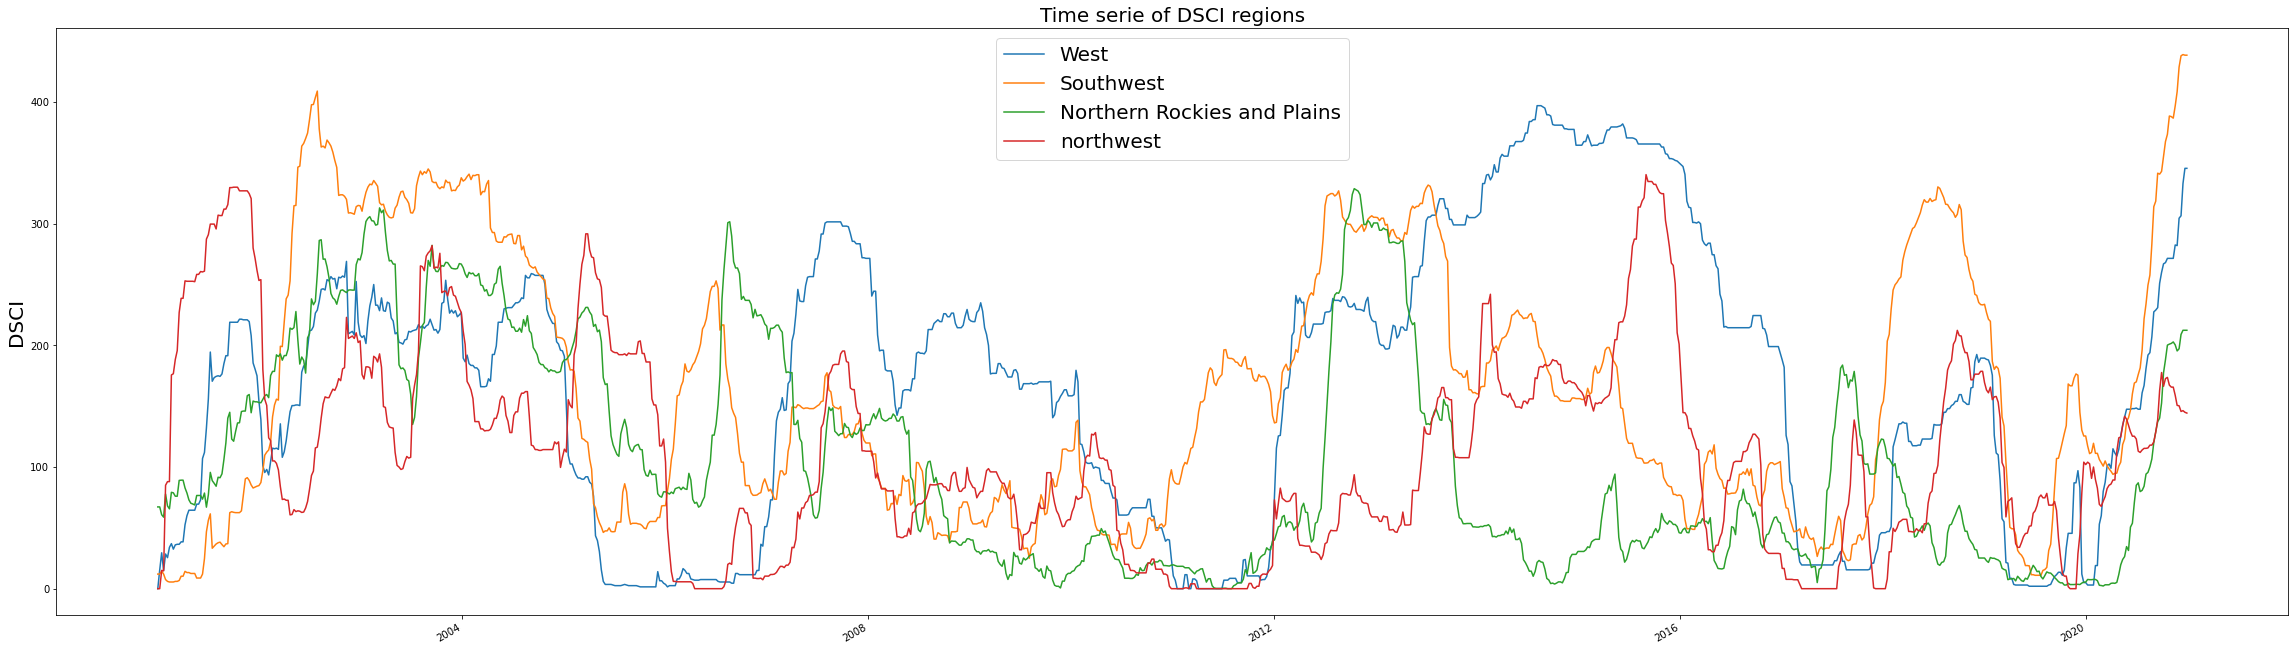

In [280]:
fig, ax = plt.subplots(figsize=(40, 12))

ax.plot(west_df['DSCI'])
ax.plot(southwest_df['DSCI'])
ax.plot(nrp_df['DSCI'])
ax.plot(northwest_df['DSCI'])

plt.title('Time serie of DSCI regions',fontdict={'fontsize':20});
plt.ylabel("DSCI",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper center',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_3_drought_regions.png')

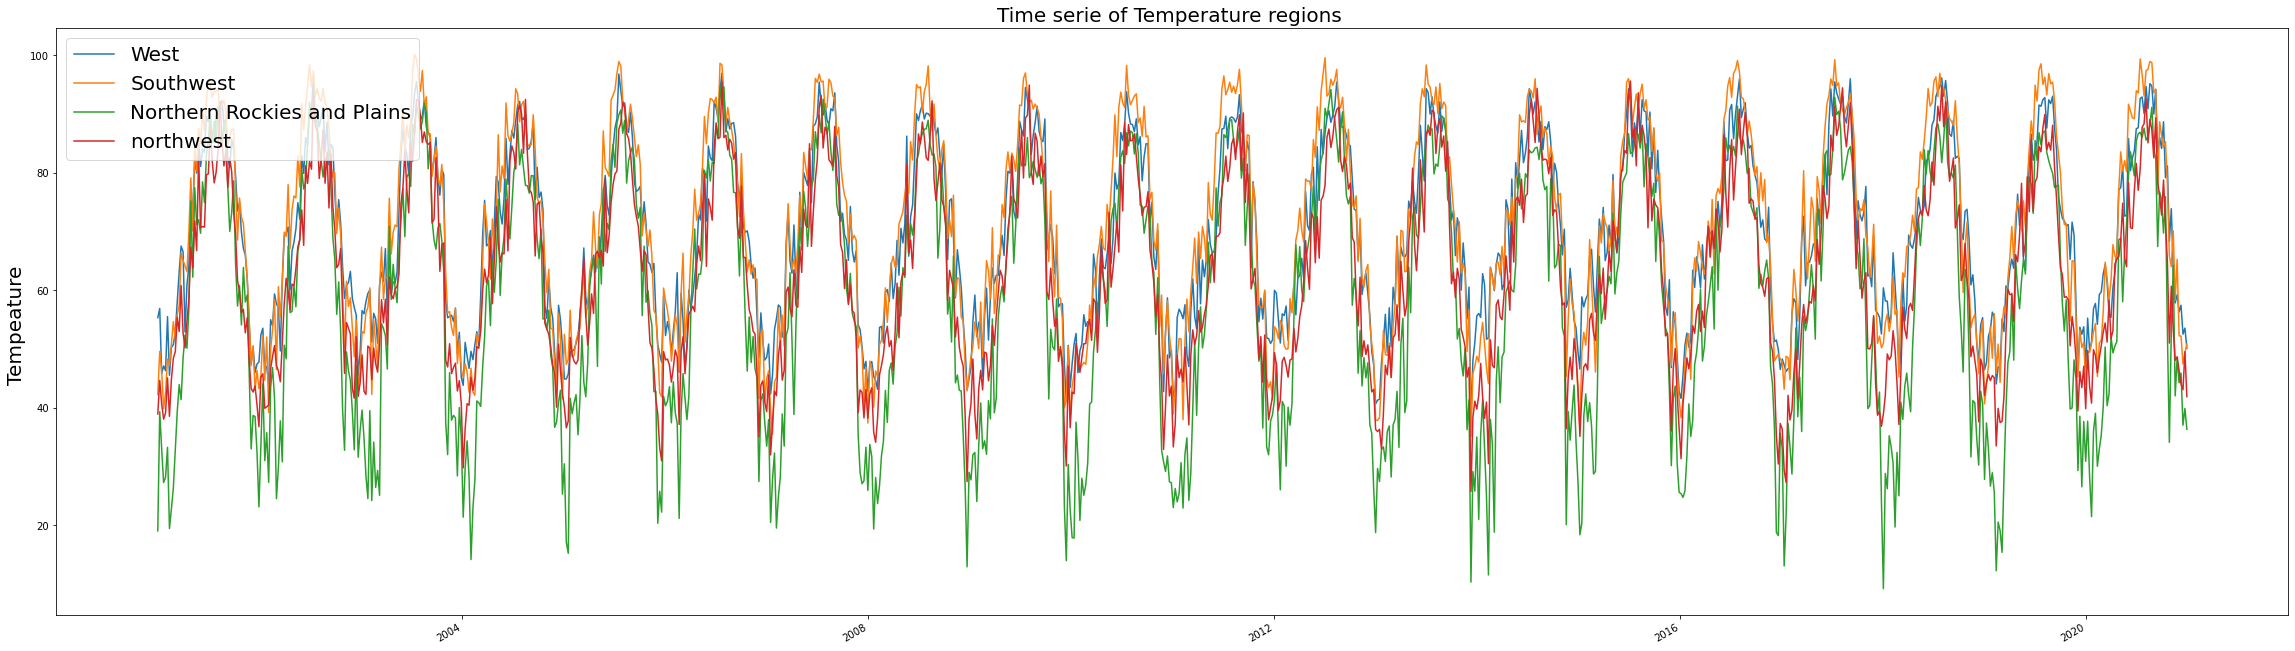

In [281]:
fig, ax = plt.subplots(figsize=(40,12))

ax.plot(west_df['avg_tmax'])
ax.plot(southwest_df['avg_tmax'])
ax.plot(nrp_df['avg_tmax'])
ax.plot(northwest_df['avg_tmax'])

plt.title('Time serie of Temperature regions ',fontdict={'fontsize':20});
plt.ylabel("Tempeature ",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_temp_3_regions.png')

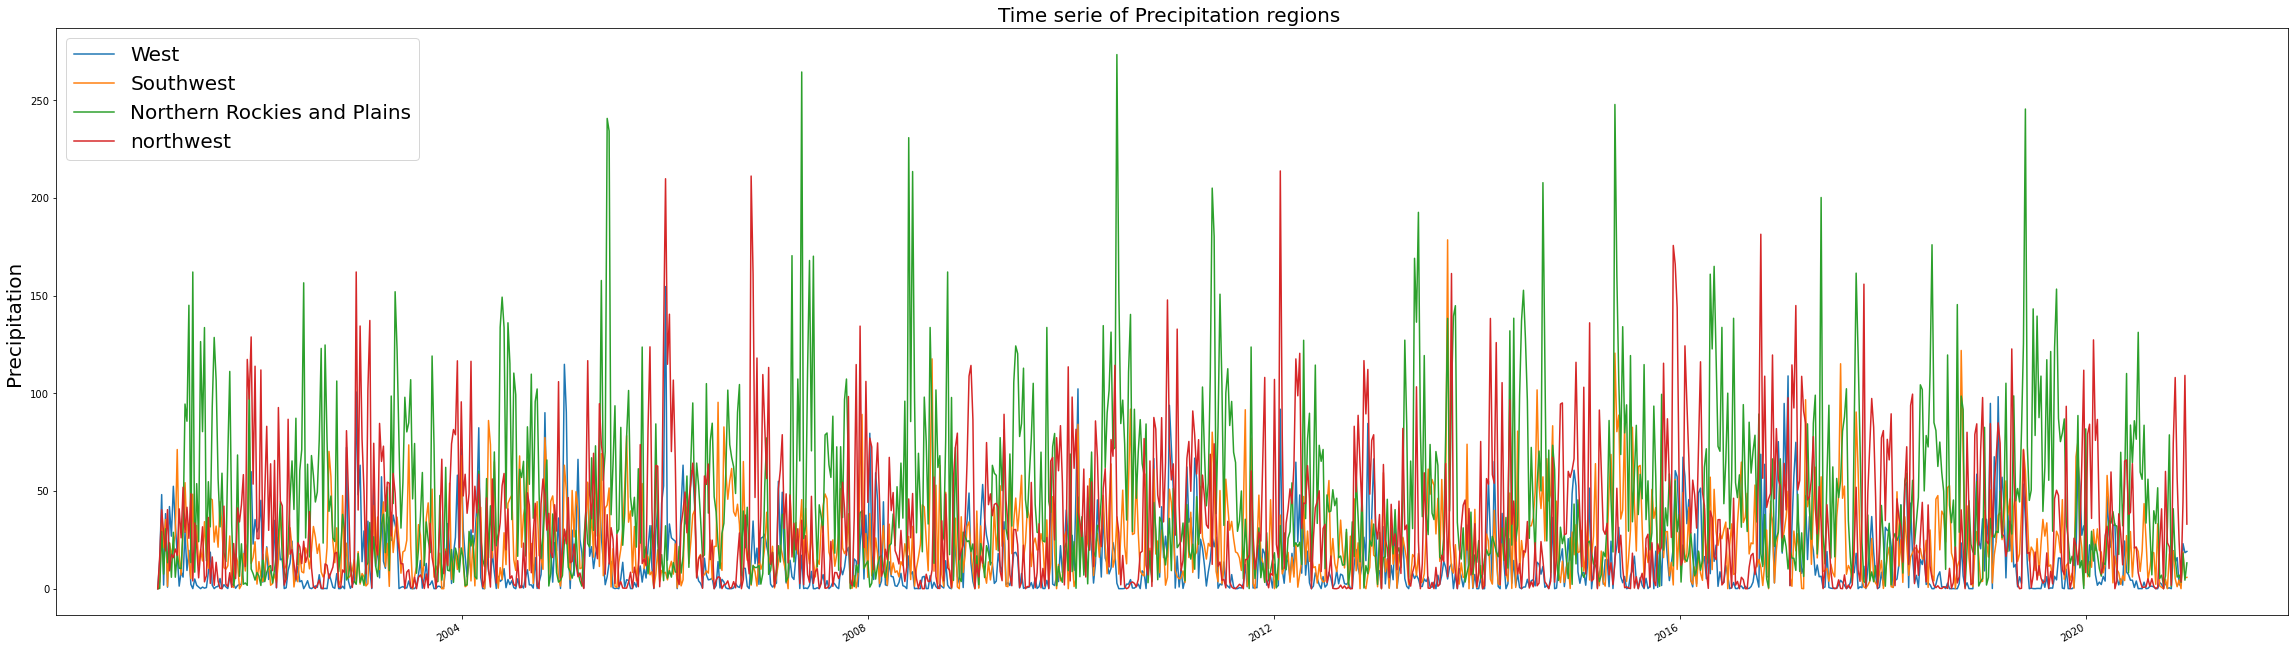

In [282]:
fig, ax = plt.subplots(figsize=(40, 12))

ax.plot(west_df['total_avg_prcp_mm'])
ax.plot(southwest_df['total_avg_prcp_mm'])
ax.plot(nrp_df['total_avg_prcp_mm'])
ax.plot(northwest_df['total_avg_prcp_mm'])

plt.title('Time serie of Precipitation regions ',fontdict={'fontsize':20});
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_3_prec_regions.png')

### West Analysis

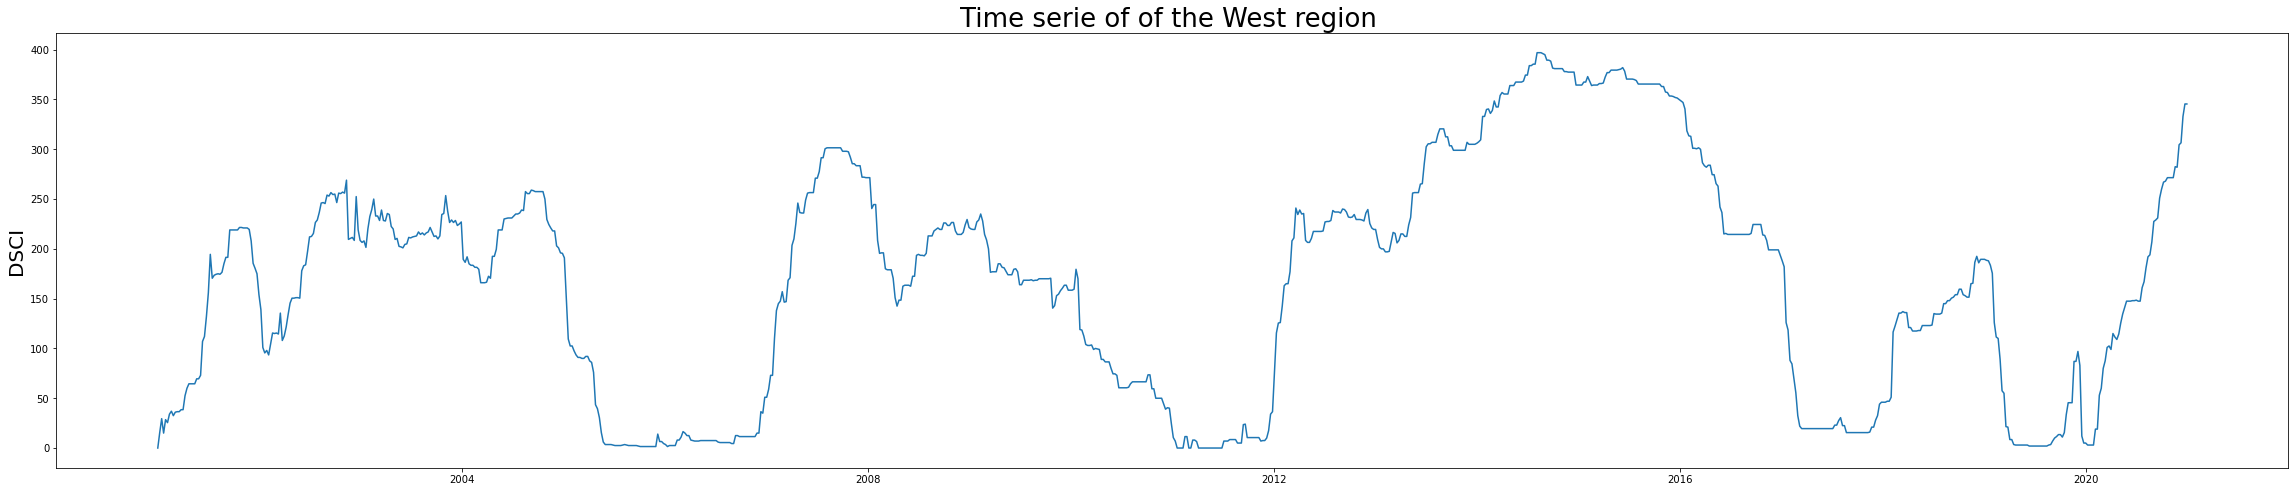

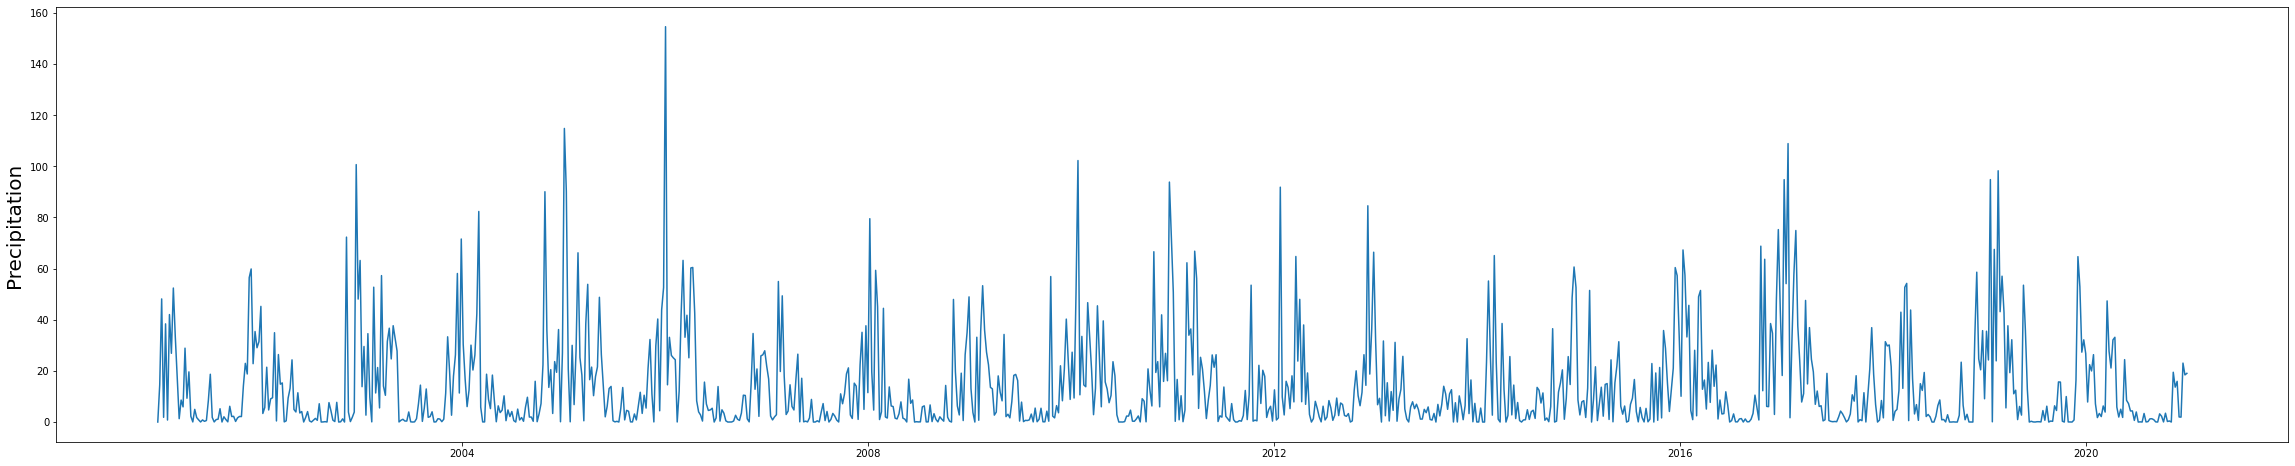

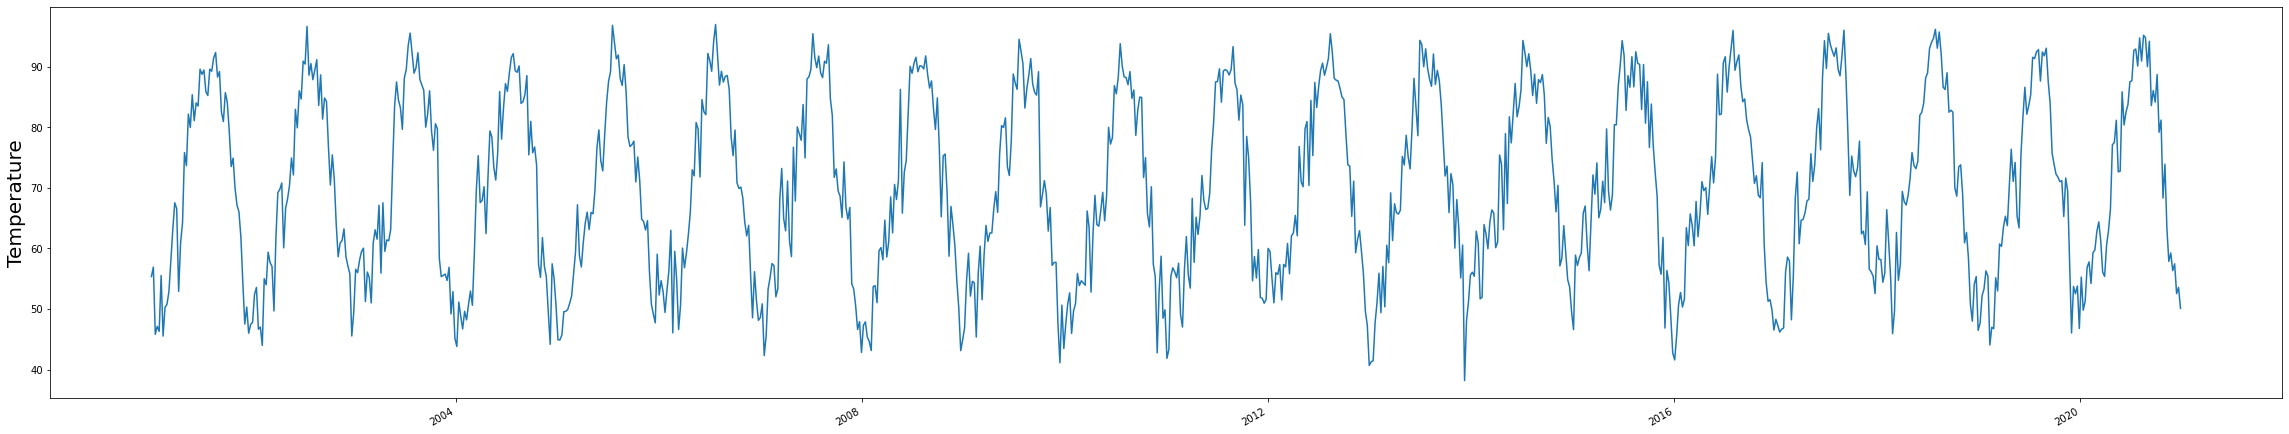

In [300]:

fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(west_df['DSCI'])
plt.title('Time serie of of the West region ',fontdict={'fontsize':26});
plt.ylabel("DSCI",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(west_df['total_avg_prcp_mm'])
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(west_df['avg_tmax'])
plt.ylabel("Temperature",fontdict={'fontsize':20});

### Southwest Analysis

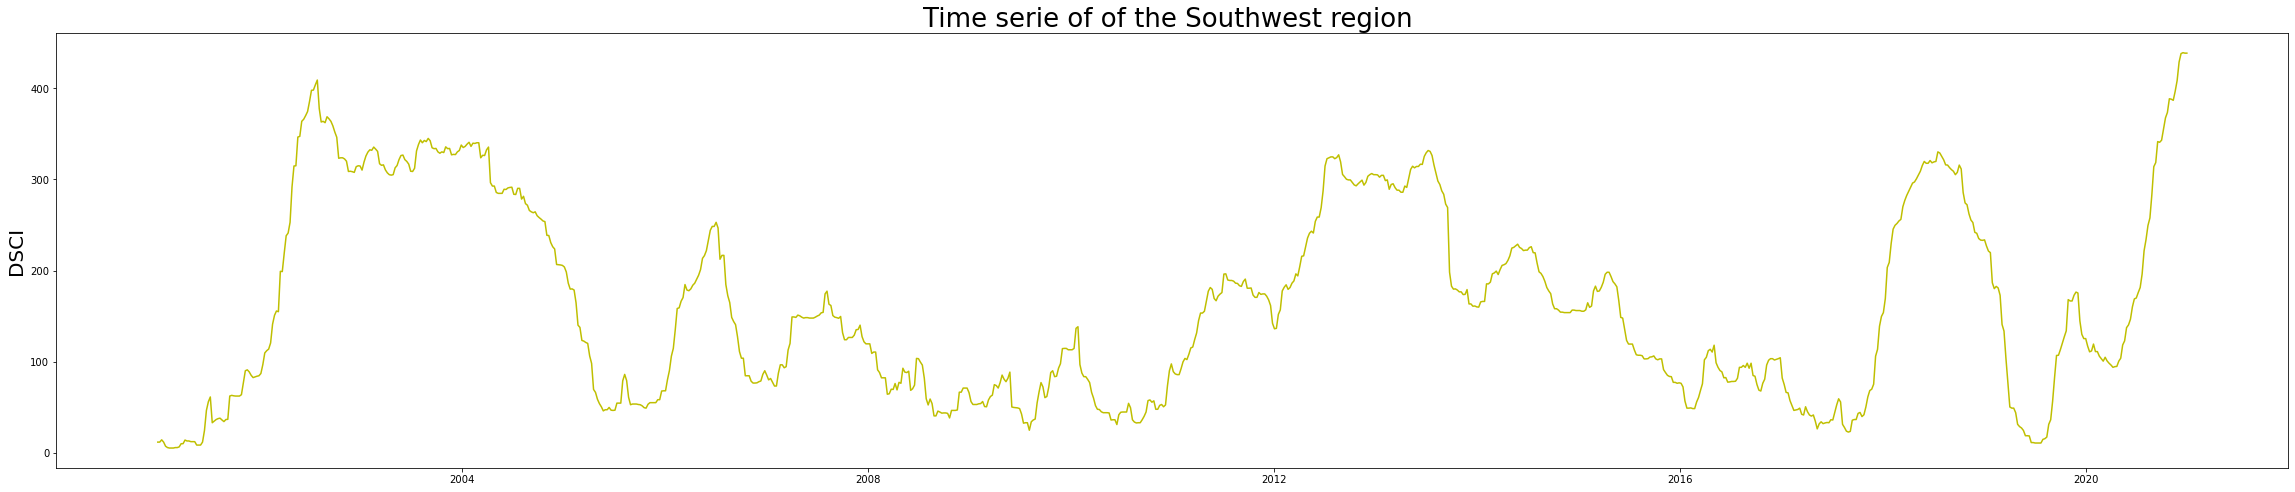

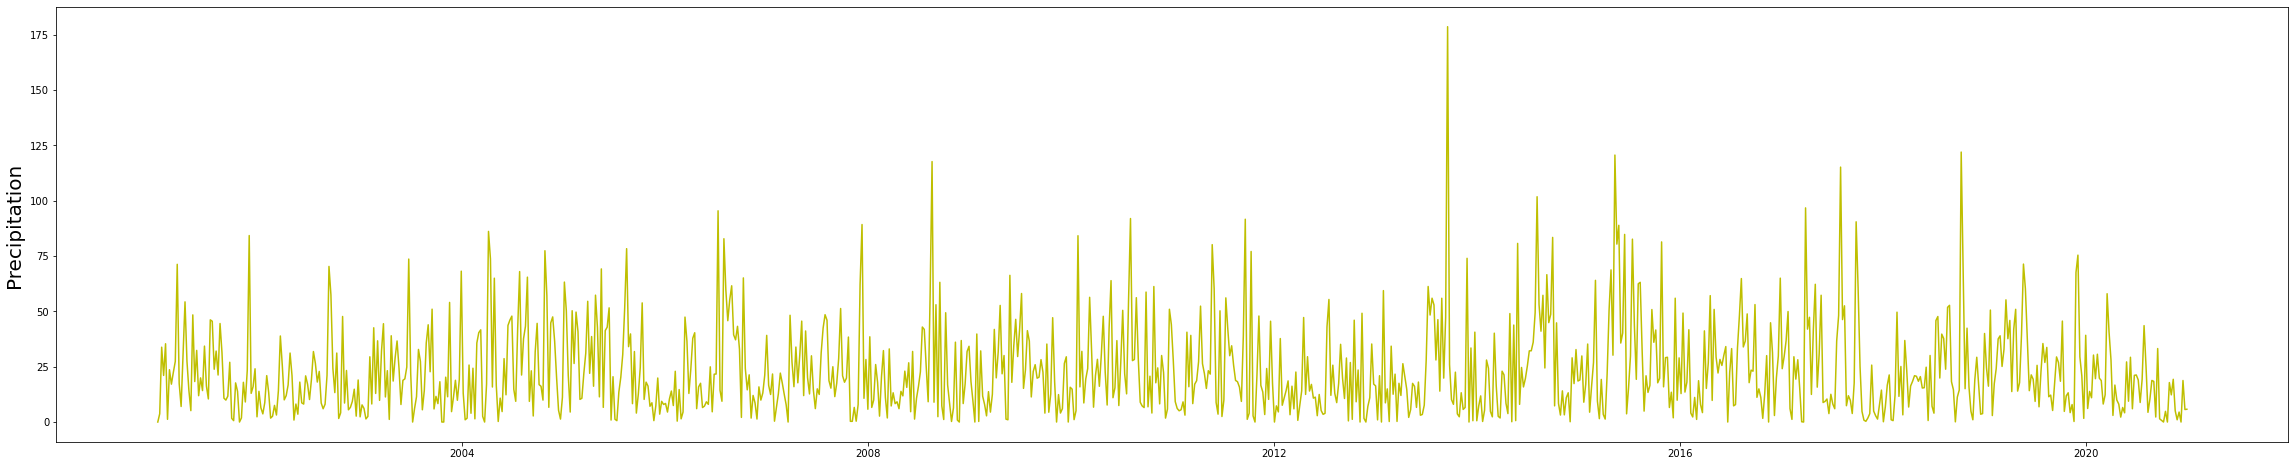

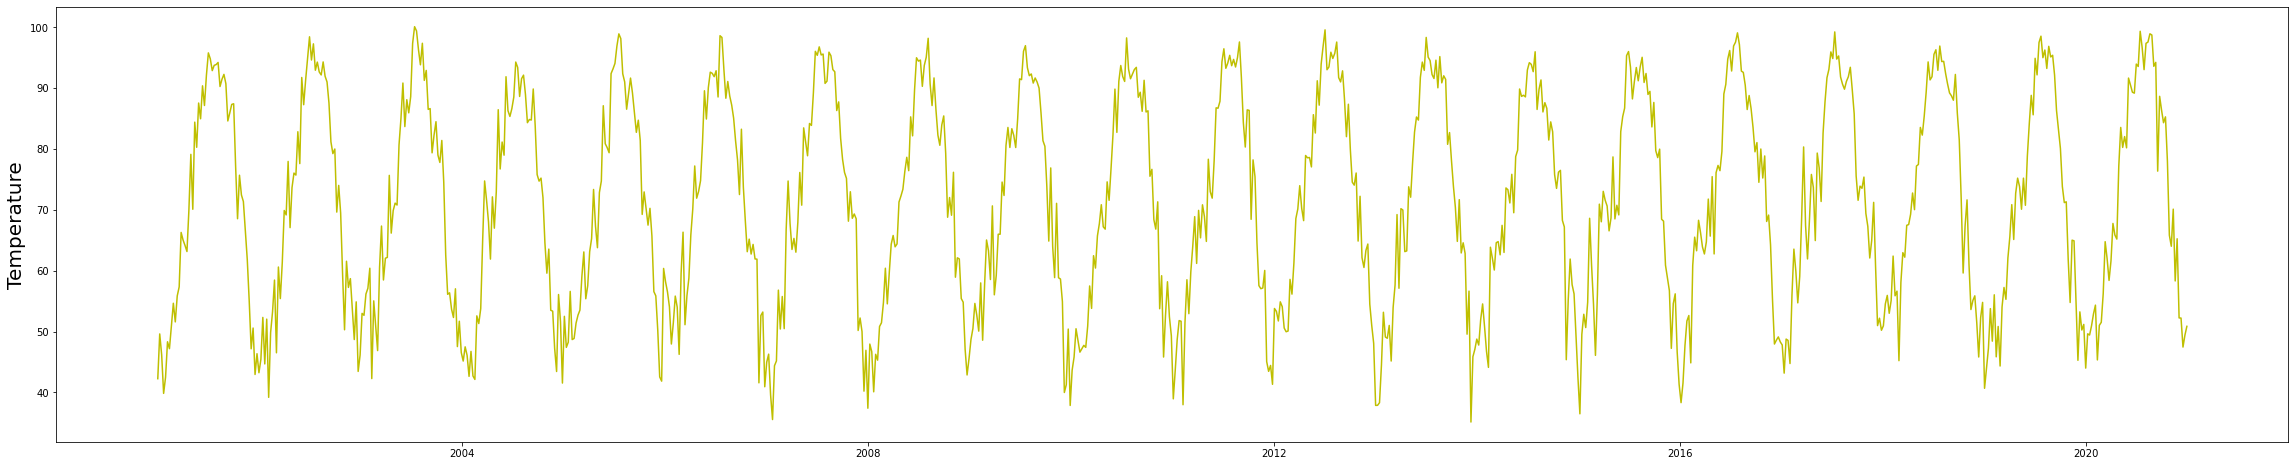

In [299]:
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(southwest_df['DSCI'],color='y')
plt.title('Time serie of of the Southwest region ',fontdict={'fontsize':26});
plt.ylabel("DSCI",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(southwest_df['total_avg_prcp_mm'],color='y')
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(southwest_df['avg_tmax'],color='y')
plt.ylabel("Temperature",fontdict={'fontsize':20});

### Northern Rockies and Plains Analysis

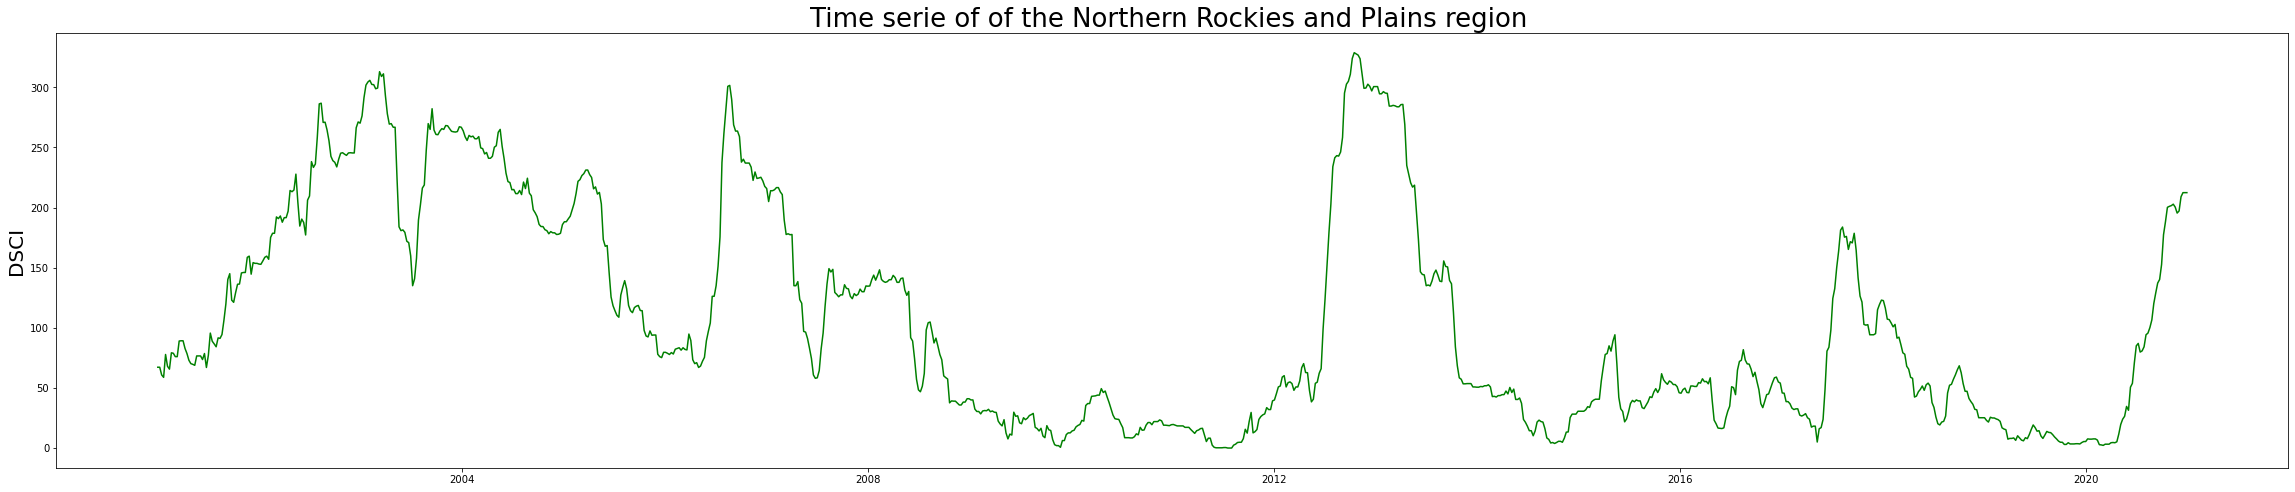

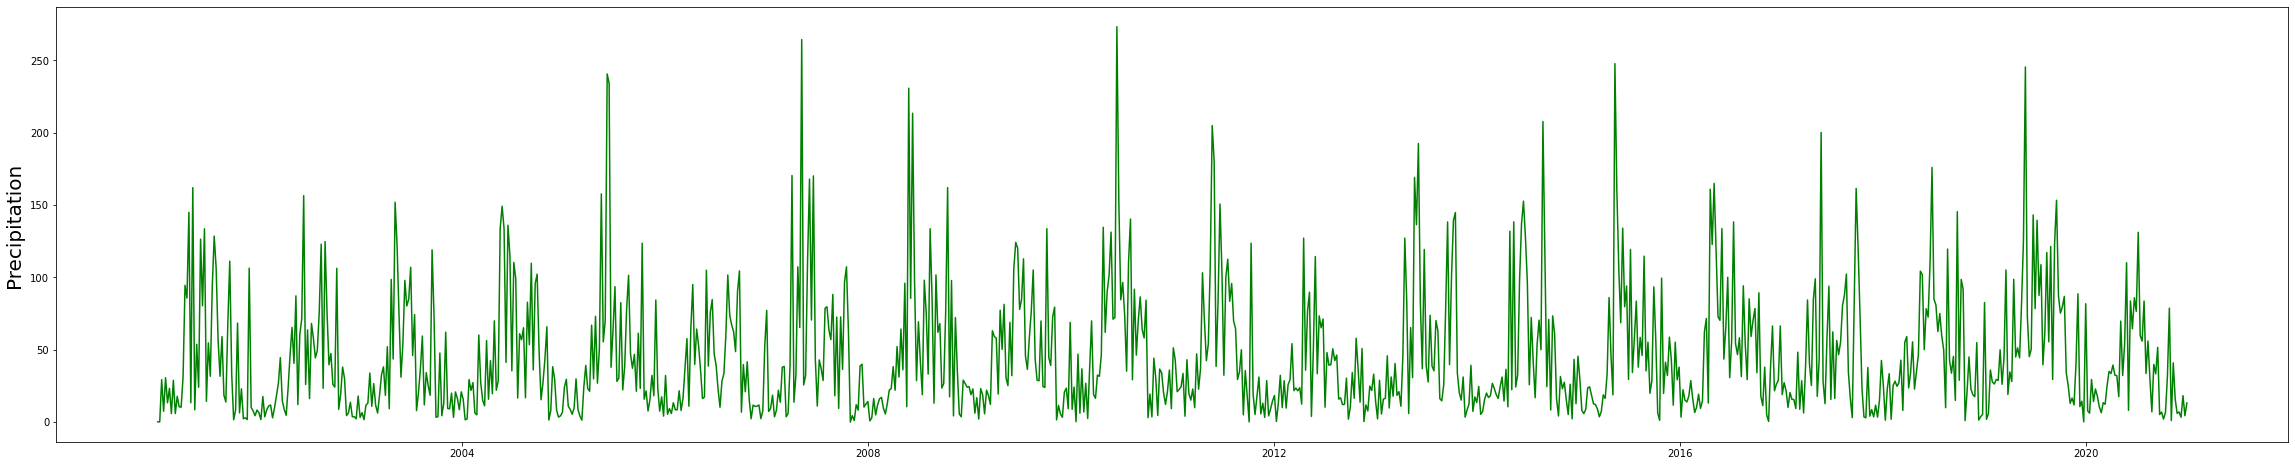

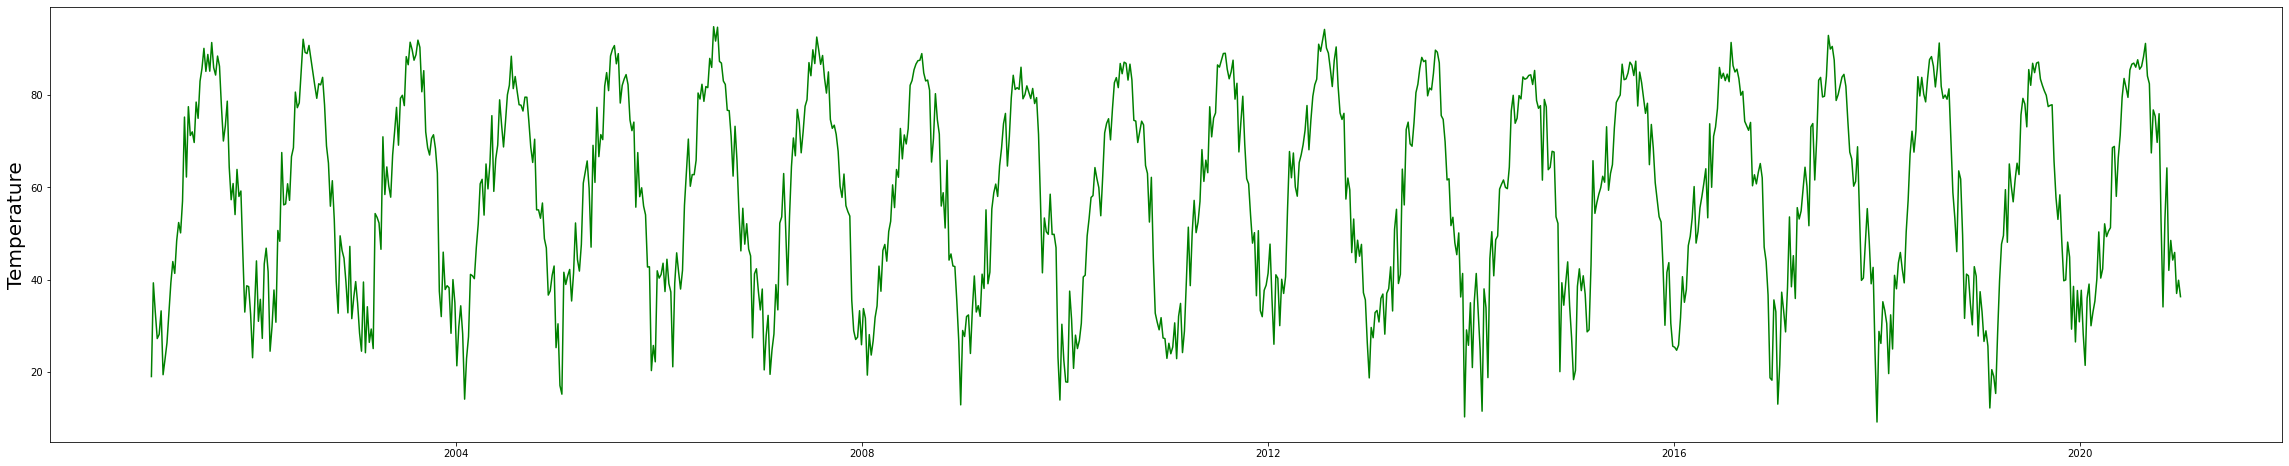

In [297]:
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(nrp_df['DSCI'],color='g')
plt.title('Time serie of of the Northern Rockies and Plains region ',fontdict={'fontsize':26});
plt.ylabel("DSCI",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(nrp_df['total_avg_prcp_mm'],color='g')
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(nrp_df['avg_tmax'],color='g')
plt.ylabel("Temperature",fontdict={'fontsize':20});

### northwest Analysis

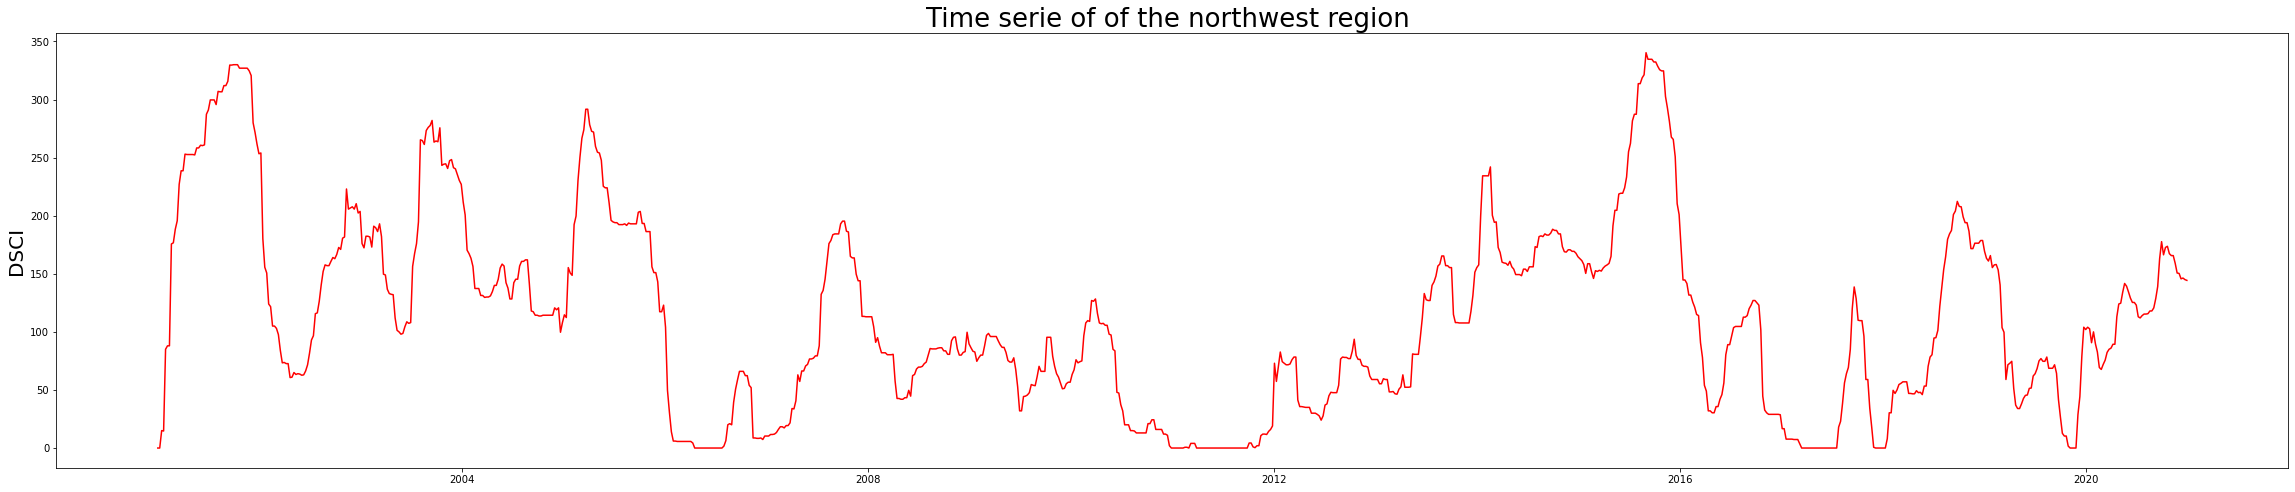

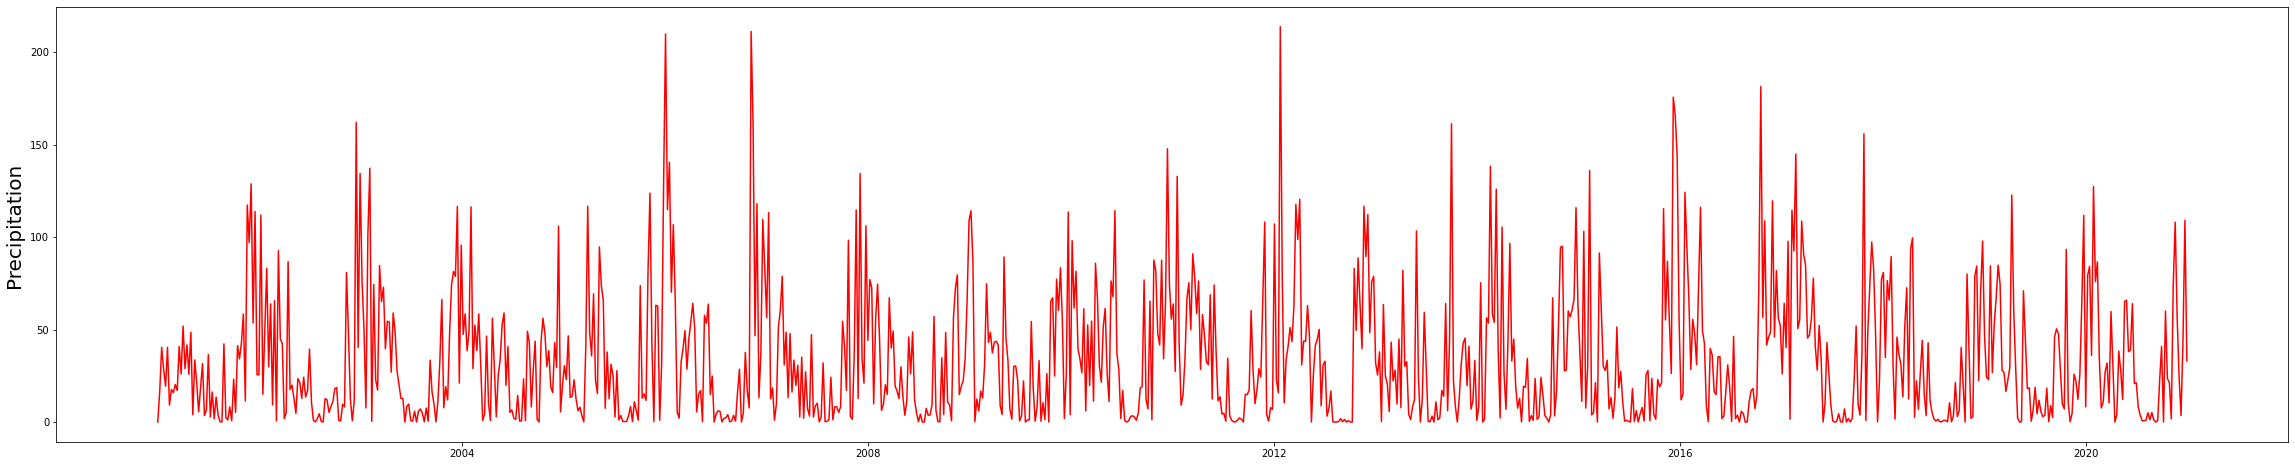

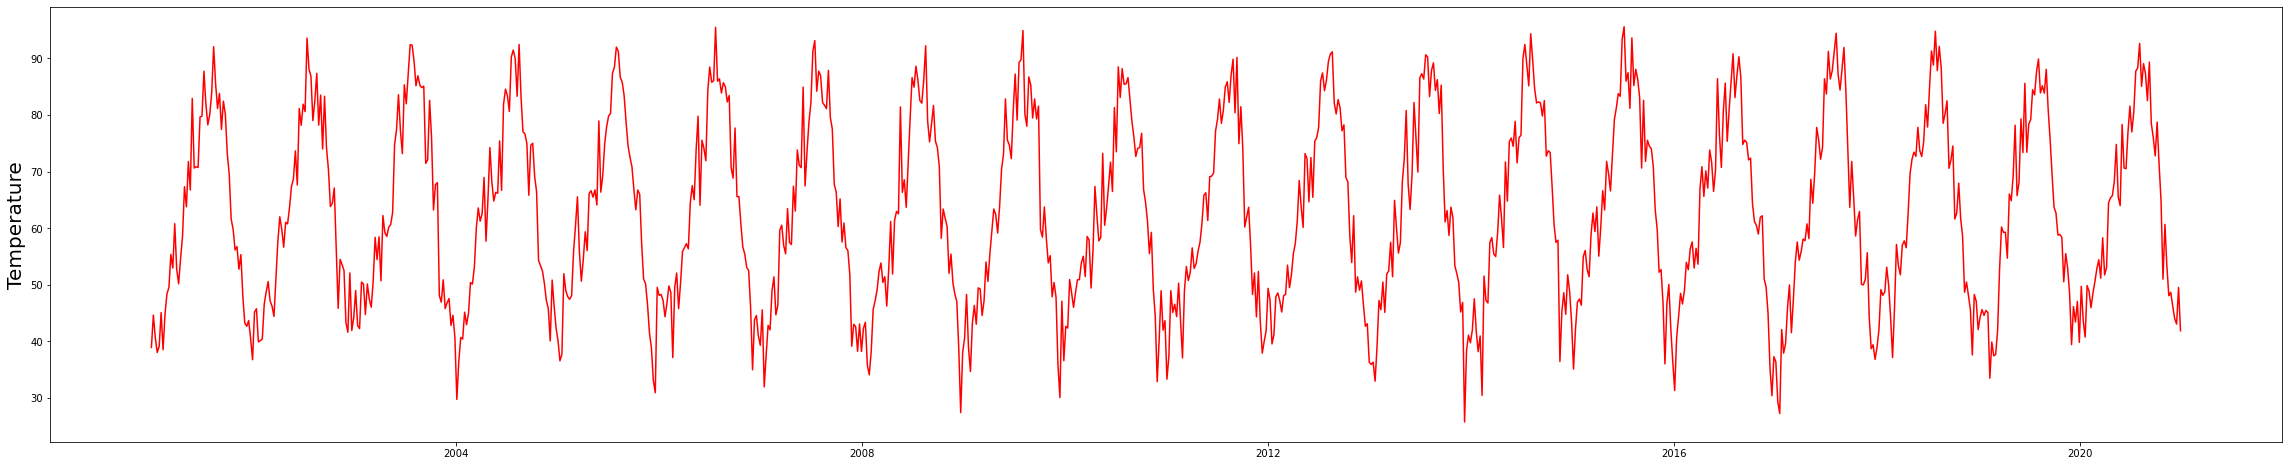

In [296]:
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(northwest_df['DSCI'],color='r')
plt.title('Time serie of of the northwest region ',fontdict={'fontsize':26});
plt.ylabel("DSCI",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(northwest_df['total_avg_prcp_mm'],color='r')
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
fig, ax = plt.subplots(figsize=(40, 8))
ax.plot(northwest_df['avg_tmax'],color='r')
plt.ylabel("Temperature",fontdict={'fontsize':20});

## graphics of the states 

In [311]:
data.groupby(data['state'])['DSCI'].median()

state
AL     35.0
AR     20.0
AZ    197.0
CA    140.0
CO    104.0
DE      0.0
FL     28.0
GA     60.0
IA     16.0
ID    116.0
IL      7.0
IN      0.0
KS     66.0
KY      1.0
LA     26.0
MA      0.0
MD      5.0
ME      0.0
MI     16.0
MN     30.0
MO     24.0
MS     17.0
MT     74.0
NC     37.5
ND     50.0
NE     54.0
NH      0.0
NJ      0.0
NM    145.0
NV    181.5
NY      7.0
OH      1.0
OK     74.0
OR    101.0
SC     56.0
SD     66.0
TN     11.5
TX    106.0
UT    142.5
VA     15.5
VT      0.0
WA     59.0
WI     16.0
WV      3.0
WY     90.0
Name: DSCI, dtype: float64

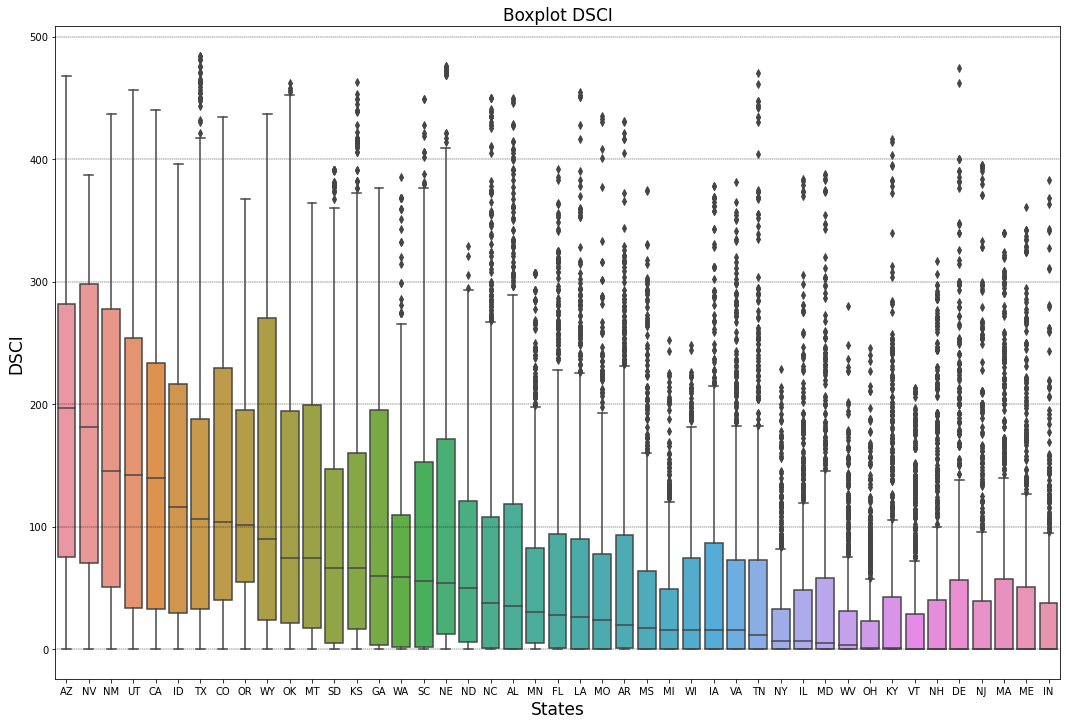

In [313]:
#graph the DCSI of the regions
my_order = data.groupby(by=['state'])['DSCI'].median().sort_values().iloc[::-1].index
plt.figure(figsize=(18, 12))
sns.boxplot(x='state',
    y='DSCI',
    data=data,order=my_order)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('States',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('../images/drought_boxplot_states.png')

In [307]:
#creating a dataframe for the avarege drought of the state by year
mean_year= data.groupby(by=[data['ValidEnd'].dt.year,data['state']])['DSCI'].agg([ 'mean'])
mean_year.reset_index(inplace=True)
mean_year.rename(columns={'mean':'mean_DSCI'},inplace=True)
mean_year.head()

ValidEnd state  mean_DSCI
0      2001    AL  51.320755
1      2001    AR  46.792453
2      2001    AZ   1.981132
3      2001    CA  89.188679
4      2001    CO  18.962264

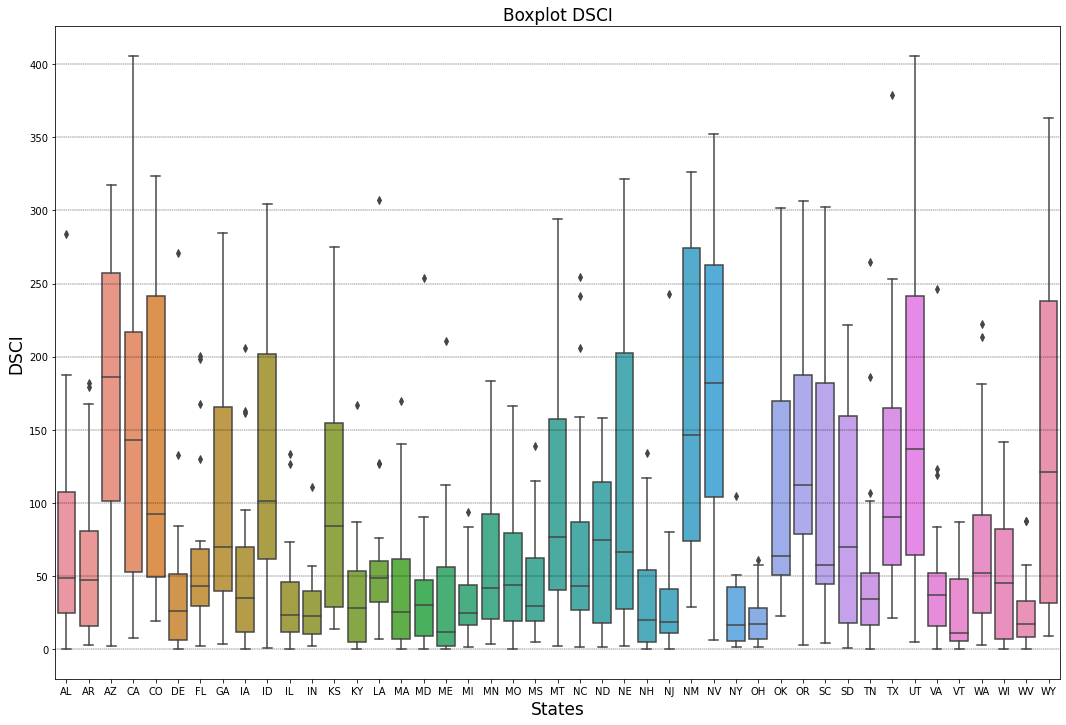

In [309]:
#graph the DCSI of the regions
plt.figure(figsize=(18, 12))
sns.boxplot(x='state',
    y='mean_DSCI',
    data=mean_year)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('States',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
#plt.savefig('./images/drought_boxplot.png')